# CS5901 Assignment 2

#### Objective:
This notebook demonstrates a thorough workflow for cleaning and profiling a dataset, as well as investigating the time and space complexity of different algorithms.

#### Structure:

Stage 1: Import, clean, and investigate a dataset, using self-developed methods.

Stage 2: Investigate the computational performance of standard algorithms, including matrix multiplication, sorting, and substring searching. The algorithms performance when scaled is also explored.

All code is contained in a separate .py file and is fully documented. The notebook imports this code, demonstrates its use, and discusses results and design decisions throughout.

## Stage 1: Data Cleaning and Profiling

This stage of the assignment demonstrates methods for cleaning a Pandas DataFrame using the <code>CleanerClass</code> from the 'assignment2_script' module. By creating a <code>CleanerClass</code> object and utilising its methods, the DataFrame can be cleaned and transformed directly within the class, updating the <code>self.df</code> attribute. This structured approach highlights the advantages of object-oriented and modular programming, such as reduced reliance on intermediate variables, tidy workflows, and reusable code. All classes and methods are documented in the accompanying .py file for further reference.

### 1. Import the data as a pandas dataframe

**Note:** This notebook expects the file 'P2data3810.csv' to be in the same directory when run.


In [1]:
import pandas as pd
df = pd.read_csv('P2data3810.csv')

### 2. Identify and remove any data rows that make no sense

In [2]:
import A2 as a2

In [3]:
df.head(5)

,Level\tT4\tT3\tT3adjusted\tT4adjusted
0,5\t8.1\t2.1\t2.00829885\t1.280579165
1,5\t8.7\t\t2.056710116\t
2,10\t3.5\t1.6\t1.518294486\t1.169607095
3,20\t7.9\t4.6\t1.991631701\t1.663103499
4,30\t2.3\t0.4\t1.320006122\t0.7368063


In [4]:
print(df.shape)

(482, 1)


This DataFrame initially contains a single column, containing '\t' characters. Using the  <code>split_cols()</code> method, the DataFrame can be split into multiple columns. The method splits the single column in the DataFrame at a specified separator, in this case '\t', and updates the <code>self.df</code> attribute in place.

In [5]:
cleaner = a2.CleanerClass(df)
cleaner.split_cols('\t');

Header split completed.
Original number of columns: 1, New number of columns: 5 
Number of rows: 482


In [6]:
# Inspect updated DataFrame
cleaner.df.head(8)

,Level,T4,T3,T3adjusted,T4adjusted
0,5,8.1,2.1,2.00829885,1.280579165
1,5,8.7,,2.056710116,
2,10,3.5,1.6,1.518294486,1.169607095
3,20,7.9,4.6,1.991631701,1.663103499
4,30,2.3,0.4,1.320006122,0.7368063
5,20,5.4,2.6,1.754410643,1.375068867
6,5,1.8,,1.216440399,
7,5,10.5,,2.18975957,


The <code>col_order_sort()</code> method allows us to re-order the columns of the DataFrame and sort the rows, making the data easier to read and interpret.

In [7]:
cleaner.col_order_sort(['Level','T3', 'T3adjusted', 'T4', 'T4adjusted'], 'Level');

In [8]:
# Inspect sorted DataFrame
cleaner.df.head(10)

,Level,T3,T3adjusted,T4,T4adjusted
0,10,7.9,2.438499481,14.5,1.991631701
1,10,,2.601182894,17.6,
2,10,3.7,1.83709055,6.2,1.546680374
3,10,15.9,2.951057746,25.7,2.514581454
4,10,23.2,2.977611106,26.4,2.852086294
5,10,0.7,-1.638642541,-4.4,0.887904002
6,10,4.9,2.064560231,8.8,1.698499252
7,10,17.3,2.455202052,14.8,2.586318667
8,10,39.9,3.559526091,45.1,3.417099555
9,10,42.3,3.631715652,47.9,3.484283271


In [9]:
# Check column data types
print(cleaner.df.dtypes)

Level         object
T3            object
T3adjusted    object
T4            object
T4adjusted    object
dtype: object


The DataFrame, stored as 'object' data types, needs to be converted to numeric types (integers or floats). The <code>to_numeric()</code> method on the <code>cleaner</code> object handles this conversion, replacing missing data with <code>NaN</code>. 

In [10]:
cleaner.to_numeric(['Level', 'T3', 'T3adjusted', 'T4', 'T4adjusted']);

Number of NaN values per column:
Level           0
T3            100
T3adjusted      4
T4              8
T4adjusted    101
dtype: int64

Percentage of NaN values per column: 
Level          0.00
T3            20.75
T3adjusted     0.83
T4             1.66
T4adjusted    20.95
dtype: float64


There is a high count and percentage of missing values in the columns 'T3' and 'T4adjusted'. As 'T3' will  have missing values imputed later on, we first focus on 'T4adjusted'. The method <code>no_adjustment()</code> checks whether missing values in a specified column align with those missing in another, by specifying column pairs.

In [11]:
cleaner.no_adjustment(('T3', 'T3adjusted'), ('T4', 'T4adjusted'))

Rows with T3 but no T3adjusted: 2
Rows with T4 but no T4adjusted: 99


The majority of rows with missing values in 'T3adjusted' and 'T4adjusted' contain values in 'T3' and 'T4'. As there is no context around the data given it is unclear how to deal with the missing data in the adjusted columns. Imputing values into the adjusted columns may introduce significant bias into our dataset. Removing these rows will remove 101 rows from the DataFrame, which greatly reduces the size of the data and removes a large proportion of the data given in columns 'T3' and 'T4. Therefore these values will be left as missing. 
If it was deemed more appropriate to remove the rows from the DataFrame, a method is set up for this, <code>drop_missing_adjustment()</code>. This was tested when exploring the effects of dropping the rows with missing adjusted data.

Rows that are either all empty or all zero are likely erroneous data points and can be removed from the DataFrame using methods <code>rm_empty_rows()</code> and <code>rm_zero_rows()</code>. These methods are chained together for efficiency, demonstrating a benefit of conducting data cleaning within <code>CleanerClass</code>. In both methods, a specific column can be given as an argument, in this case 'Level' is input. This column is ignored from the checks for empty or zero rows, and is done so as the 'Level' column relates to categorical data, where each 'Level' is some category and as such is not missing in any row. 

In [12]:
cleaner.rm_empty_rows(col_to_ignore='Level').rm_zero_rows('Level');

Number of rows removed from DataFrame: 2
Percentage of rows removed: 0.41

Number of rows removed from DataFrame: 2
Percentage of rows removed: 0.42



The columns 'T3adjusted' and 'T4adjusted' should have the same sign as the columns 'T3' and 'T4' respectively, as any adjustment factor should scale a result, rather than change its sign. Any rows where the signs don't match for a pair of columns are removed using the <code>rm_unmatched_signs</code> method. 

In [13]:
cleaner.rm_unmatched_signs('T3', 'T3adjusted', 'T4', 'T4adjusted');

Number of rows removed from DataFrame: 21
Percentage of rows removed: 4.39



Our DataFrame has been cleaned to remove any rows where data doesn't make sense. The decisions made during this process reflect a balance between removing unreliable data and preserving the original data distribution. To verify our results, the DataFrame's shape and head can be inspected.

In [14]:
cleaner.df.head(5)

,Level,T3,T3adjusted,T4,T4adjusted
0,10,7.9,2.438499,14.5,1.991632
1,10,NaN,2.601183,17.6,NaN
2,10,3.7,1.837091,6.2,1.546680
3,10,15.9,2.951058,25.7,2.514581
4,10,23.2,2.977611,26.4,2.852086


In [15]:
print(cleaner.df.shape)

(457, 5)


Our DataFrame has had $482 - 457 = 25$ rows removed, and has been expanded from 1 column to 5 columns.

### 3. Replace any missing values in T3 and T4 with average values for their specific level

<code>CleanerClass</code> contains a method to replace missing values with average values. The docstring provides information on how this process works.

In [16]:
cleaner.replace_missing_values('Level', ['T3', 'T4']);

Missing values in columns ['T3'] and ['T4'] were replaced by the average values for their specific level.


In [17]:
print(cleaner.nan_count())

Number of NaN values per column:
Level          0
T3             0
T3adjusted     2
T4             0
T4adjusted    99
dtype: int64

Percentage of NaN values per column: 
Level          0.00
T3             0.00
T3adjusted     0.44
T4             0.00
T4adjusted    21.66
dtype: float64
None


The method <code>nan_count()</code> confirms that there are no longer any missing values in the columns 'T3' and 'T4', as they have been imputed with average values at specific for specific 'Levels'.

### 4. Descriptive statistics  without pandas.describe()

In [18]:
cleaner.diy_describe()

,Level,T3,T3adjusted,T4,T4adjusted
count,457.000000,457.000000,455.000000,457.000000,358.000000
mean,34.814004,12.892834,2.090549,15.637773,1.968579
std,64.910687,14.773493,1.203857,19.807030,1.154312
min,5.000000,-38.400000,-3.541014,-44.400000,-3.373731
max,400.000000,148.400000,6.172756,235.200000,5.294334
var,4213.397347,218.256091,1.449271,392.318426,1.332437
0.25,10.000000,4.276183,1.713024,5.320000,1.508466
0.5,20.000000,8.300000,2.220298,11.266667,2.011955
0.75,30.000000,16.867518,2.705339,19.800000,2.676531
range,395.000000,186.800000,9.713770,279.600000,8.668064


In [19]:
cleaner.df.describe()

,Level,T3,T3adjusted,T4,T4adjusted
count,457.000000,457.000000,455.000000,457.000000,358.000000
mean,34.814004,12.892834,2.090549,15.637773,1.968579
std,64.910687,14.773493,1.203857,19.807030,1.154312
min,5.000000,-38.400000,-3.541014,-44.400000,-3.373731
25%,10.000000,4.276183,1.713024,5.320000,1.508466
50%,20.000000,8.300000,2.220298,11.266667,2.011955
75%,30.000000,16.867518,2.705339,19.800000,2.676531
max,400.000000,148.400000,6.172756,235.200000,5.294334


The <code>CleanerClass</code> method <code>diy_describe()</code> produces a Pandas DataFrame of summary statistics for each column of a numeric DataFrame. This includes aggregates such as count, mean, standard deviation, and variance, as well as metrics such as the range, IQR, skewness, and the count of missing values. These additional metrics can allow deeper analysis than those provided in <code>pandas.describe()</code>, which gives only the aggregate and percentile metrics. 
For instance the skewness metric tells us that the columns 'Level' and 'T4' have strong positive skewness, indicating that the majority of data is concentrated at lower values, and there are some extreme large values. This may suggest some further cleaning is required, to remove outlier values. Moreover, the addition of the 'missing_values' column highlights the need to further clean the 'T4adjusted' column, to reduce the number of missing values.

However,  <code>diy_describe()</code> assumes all columns are numeric, raising an error if non-numeric data is included, whereas <code>pandas.describe()</code> automatically excludes non-numeric columns - this makes it more versatile. Both methods take no parameters, so are similarly easy to use. 

### 5. Identify any repeated rows, or confirm that there are none

The <code>rm_duplicates()</code> method checks for duplicates in a DataFrame. If duplicates are found, the first occurrence of each duplicate row is kept and all others are dropped. 

In [20]:
cleaner.rm_duplicates();

The following duplicate rows were found and removed:
     Level         T3  T3adjusted    T4  T4adjusted
37      10  11.400000    2.705339  19.8    2.250617
98     100  17.800000    2.673075  19.1    2.610999
99     100   9.100000    2.654283  18.7    2.087759
139    150  27.600000    3.086378  29.4    3.022060
143    150  -4.500000   -2.386966 -13.6   -1.650964
252     20   4.500000    1.587401   4.0    1.650964
272     20  15.600000    2.691606  19.5    2.498666
285    200  37.300000    2.535494  16.3    3.341204
286    200   3.800000    1.866256   6.5    1.560491
287    200   9.000000    2.345290  12.9    2.080084
288    200  15.785714    2.289428  12.0         NaN
331    300   8.000000    1.903778   6.9    2.000000
384    400  14.700000    1.392477   2.7    2.449660
388    400   1.800000    0.843433   0.6    1.216440
389    400  12.900000    2.460719  14.9    2.345290
438      5  12.100000    2.640012  18.4    2.295770
The resulting DataFrame has 441 rows.


#### Conclusion

The dataset has now been cleaned and prepared for analysis. The header has been split into separate columns, and the dataset has been logically ordered. Data types have been converted to numeric where necessary, and missing values replaced using group averages. Rows that make no sense, i.e. empty, zero-value, duplicates, and unmatched signs have been removed. The dataset has been explored using a custom built descriptive statistics function. Overall, these steps make the dataset much more accessible and suitable for further analysis. 

## Stage 2: Time and Space Complexity

For this stage of the assignment, the <code>TimeAndMemory</code> class is used to investigate the time and memory usage of different algorithms. The <code>investigate()</code> method runs a specified algorithm at increasing input sizes and records time and memory measurements. It can be used flexibly across different algorithms, and will be used throughout Stage 2.
Results from the different algorithms are hardcoded from a clean run to ensure reproducibility, as repeated calls to investigate() became more volatile due to system noise and effects from earlier method calls.

Each algorithm is analysed by plotting normalised time and memory usage against normalised input size to allow easier comparisons between theoretical and measured trends. Log-log plots and residual plots are also used where appropriate to assess how closely the observed scaling matched theoretical complexity models.

In [21]:
import A2 as a2

### Matrix Multiplication Investigation

In [22]:
tam = a2.TimeAndMemory()

This investigation begins with an exploration of matrix multiplication using the `TimeAndMemory` class, which contains two methods that perform matrix multiplication: `mat_mult()` and `mat_mult_np()`.

1. **Baseline Method (<code>mat_mult()</code>)**:
   - The <code>mat_mult()</code> method performs matrix multiplication using a loop-based approach.
   - While functional, this approach is inefficient. It results in longer computation times, particularly for larger matrix sizes.
   - To highlight these limitations, the matrix size for this method will be capped at 150. The relationship between matrix size, computation time, and memory usage will be examined.

2. **Optimised Method (<code>mat_mult_np()</code>)**:
   - To address the inefficiencies of the loop-based approach, the <code>mat_mult_np()</code> method utilises NumPy's  optimised <code>dot()</code> function for matrix multiplication.
   - By using this more efficient method, much larger matrices can be analysed. In this study, matrices up to size 5,000 will be investigated.
   - Analysing matrices of larger sizes can help reduce the impact of noise in the measured data, making results more reliable. 
   - The investigation will emphasise the performance benefits of this optimisation, focusing on its impact on both time and memory usage.

Through this dual approach, this section serves to highlight the importance of algorithmic efficiency and demonstrate how using optimised methods can enable scaling to larger data sizes while improving performance metrics.


#### Baseline Method (<code>mat_mult()</code>)

The <code>tam</code> object can be used to call the <code>mat_mult()</code> method. The step size is set to **15**, limiting the largest matrix size to **150**.
The <code>investigate()</code> method is used to compute and inspect the results.

In [23]:
mat_mult = tam.investigate(tam.mat_mult, 'mat_mult', step_size=15, submission=True)
print(mat_mult)

    Size   Time (s)  Memory (bytes)
0   15.0   0.007217         69632.0
1   30.0   0.079013         77824.0
2   45.0   0.262462        118784.0
3   60.0   0.661467        147456.0
4   75.0   1.452451        200704.0
5   90.0   2.369175        241664.0
6  105.0   3.473095        430080.0
7  120.0   5.244003        483328.0
8  135.0   7.414388        544768.0
9  150.0  10.134657        610304.0


From an initial inspection of these results, the time taken and memory usage for matrix multiplication increases with matrix size. The time growth appears non-linear, evident in the large time increases for bigger matrix sizes, such as from size 105 onwards. Similarly, memory usage increases with increasing matrix sizes, demonstrating that large matrices need significantly more memory and therefore matrix multiplication requires more resource. These relationships can be investigated further by plotting the measured data against scaled polynomial graphs. 

Number of values used to calculate scaling factor: 9
The scaling factor used is: 1.0453701020674602
Time residuals: [-0.00028789 -0.00020368 -0.00110253  0.00126782  0.01831526  0.01776963
 -0.00030513  0.00543271  0.00258746  0.        ]


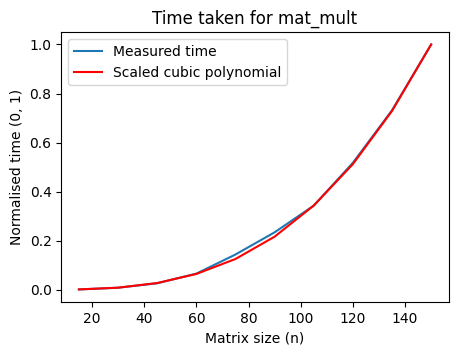

In [24]:
tam.plots('mat_mult', 'time', 'cubic')

The plot above shows matrix size (x-axis) against normalised time (y-axis). Time has been normalised to make it easier to compare the measured results with the theoretical cubic graph. Without normalisation the axes scale might make it hard to interpret the relationship between matrix size and computation time. Normalising the results ensures the trends are displayed on the same scale.

The plot above shows that the measured data follows a cubic graph closely. The expected relationship of $cn^3$ appears close to what was captured in the <code>investigate()</code> method. The scaling factor used in this plot is given above, and was calculated using the <code>calc_sf()</code> method, which works by iteratively comparing the measured time data for consecutive matrix sizes to the theoretical scaling relationship (cubic in this case). These comparisons are averaged to give the scaling factor, which is useful to gauge how closely the measured data aligns with the cubic graph. The number of data points used to calculate the scaling factor is given. If less data points are used, this implies specific data was ignored, to avoid zero division errors. 

Further to this, the residuals between the measured and scaled graphs are calculated and show no obvious trend or pattern. They appear to be randomly centred around zero, indicating a good fit between the measured and theoretical relationship.  

By taking logs of these results, the relationship $cn^3$ can be further highlighted. By doing so the equation $y = cn^3$ becomes $log(y) = log(c) + 3log(n)$, where $log(c)$ is constant. This is a straight line equation, where $log(y)$ is the dependent variable, $log(n)$ is the independent variable, $log(c)$ is the intercept, and $3$ is the slope of the line. The slope of a log plot will give us the specific relationship seen in the data, i.e. $cn^x$, where $x$ is the slope of the best fit graph. The results once again highlight the roughly cubic relationship between matrix size, and time taken for multiplication. 

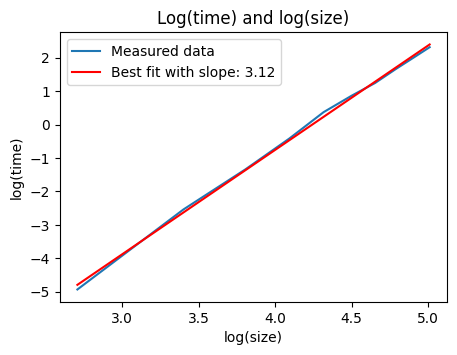

In [25]:
tam.log_plot('mat_mult', 'time')

Similar plots can be made to examine the relationship between matrix size and memory used in <code>mat_mult()</code>. In fact, plotting the measured data against a scaled quadratic graph appears to demonstrate the relationship best. 

Number of values used to calculate scaling factor: 9
The scaling factor used is: 0.8143620355178135
Memory residuals: [0.10409396 0.08751678 0.10463087 0.08161074 0.07885906 0.03597315
 0.21469799 0.15194631 0.08261745 0.        ]


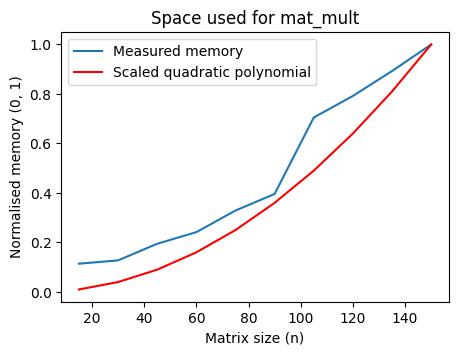

In [26]:
tam.plots('mat_mult', 'memory', 'quadratic')

The plot above suggests a quadratic relationship $cn^2$ between memory usage and matrix size. However, this relationship appears less strict than the cubic relationship observed between matrix size and time. This is evident from the residuals, where larger deviations from zero indicate greater divergence from the expected quadratic relationship.
The scaling factor used to generate the theoretical quadratic curve was calculated by comparing one data point to the next, adjusting for changes in matrix size and expected growth (e.g., quadratic in this case). Cases where two consecutive measurements were the same were excluded, as they do not show meaningful change and could reduce the accuracy of the results. This ensures that the scaling factor better reflects how the data actually grows, resulting in a more accurate fit. While effective, this method could be improved by using larger intervals or non-consecutive data points, which may help smooth out irregularities and lead to a more accurately fitted curve. Further, as the scaling factor is calculated as an average over all valid data points, using more iterations and variations would improve the accuracy.

Again, logs can be taken from both sides to highlight the relationship further. The equation $y = cn^2$ becomes $log(y) = log(c) + 2log(n)$, indicating an expected slope of 2.

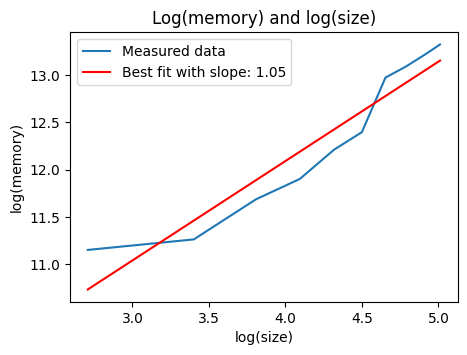

In [27]:
tam.log_plot('mat_mult', 'memory')

The best-fit slope from the log plot is less than two, indicating that the memory usage pattern does not strictly follow the theoretical quadratic relationship. This highlights the complexity of capturing memory usage in algorithms. Despite using garbage collection to measure memory accurately, factors such as caching and memory allocation optimisations could be influencing the results. Additionally, as relatively small matrix sizes were used in this study, the observed behavior might be capturing noise rather than of the underlying relationship. The method <code>mat_mult_np()</code> can be explored for higher matrix sizes to gauge how the relationship may change for larger matrix sizes.

#### Optimised Method (<code>mat_mult_np</code>)

The method <code>mat_mult_np()</code> will now be parsed into the <code>investigate()</code> method, with a step size of **500**, demonstrating how the optimised method can perform matrix multiplication much faster than the loop based approach. This is useful to evidence the complexity of algorithms and reveal the benefits of using modules such as NumPy to increase efficiency. 

In [28]:
mat_mult_np = tam.investigate(tam.mat_mult_np, 'mat_mult_np', step_size=500, submission=True)
print(mat_mult_np)

     Size  Time (s)  Memory (bytes)
0   500.0  0.030703       2097152.0
1  1000.0  0.121913       5853184.0
2  1500.0  0.309546       8491008.0
3  2000.0  0.597226       9031680.0
4  2500.0  0.994957      10604544.0
5  3000.0  1.622734      12177408.0
6  3500.0  2.379991      13692928.0
7  4000.0  3.268138      15065088.0
8  4500.0  4.443916      16896000.0
9  5000.0  5.982008      18468864.0


From the results above, <code>mat_mult_np</code> is clearly much more scalable for larger matrices. Multiplying matrices of size **5,000** would not have been possible using the loop based method due to long run times. These results can be plotted to investigate whether the measured relationships are the same.

Number of values used to calculate scaling factor: 9
The scaling factor used is: 0.8488082354820563
Time residuals: [0.00413256 0.01237995 0.02474617 0.03583704 0.04132492 0.05526911
 0.05485821 0.03432792 0.01388032 0.        ]


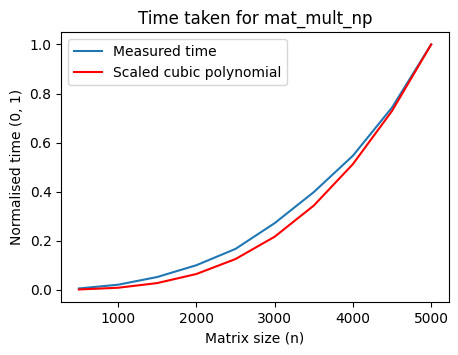

In [29]:
tam.plots('mat_mult_np', 'time', 'cubic')

From a visual inspection of the graph above, the normalised time appears to deviate from the scaled cubic polynomial slightly more than the results from using <code>mat_mult()</code>. However, it is worth noting that these deviations are relative to the scaled cubic graph, which is calculated using independently in each plot. Therefore, further investigation is needed to confirm whether how well time sticks to the theoretical curve. 

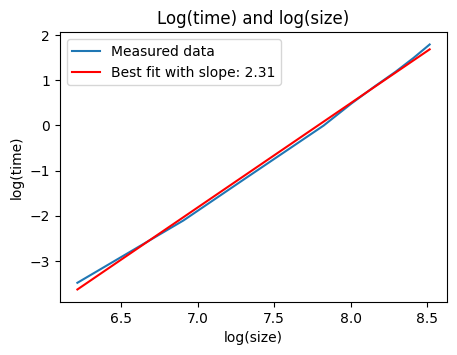

In [30]:
tam.log_plot('mat_mult_np', 'time')

The log plot above shows a slope considerably less than that of the <code>mat_mult()</code> method. This indicates that the time taken for matrix multiplication using NumPy's <code>.dot()</code> method is much less, showcasing its efficiency. This reduction in slope highlights the value of optimised algorithms when dealing with large matrices. This method would therefore be favorable in a real-world setting, as computation time is greatly reduced. 

Number of values used to calculate scaling factor: 9
The scaling factor used is: 0.9959809249387228
Memory residuals: [0.01355068 0.11692171 0.15974717 0.08902196 0.07418496 0.05934797
 0.04140608 0.01570193 0.01483699 0.        ]


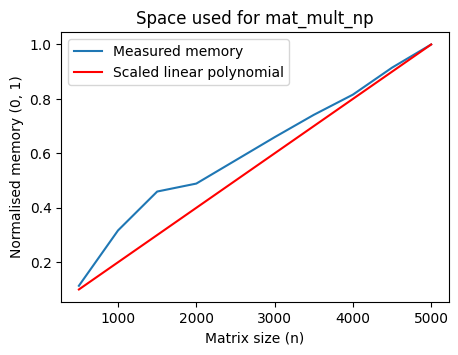

In [31]:
tam.plots('mat_mult_np', 'memory', 'linear')

The plot above is constructed by fitting a scaled linear polynomial to the measured data. This linear relationship fits the data better than a quadratic curve would, highlighting the greater efficiency of memory allocation in <code>mat_mult_np()</code> than in <code>mat_mult()</code>. As the relationship is closer to being linear than quadratic, less memory is allocated for larger sizes of matrices. 

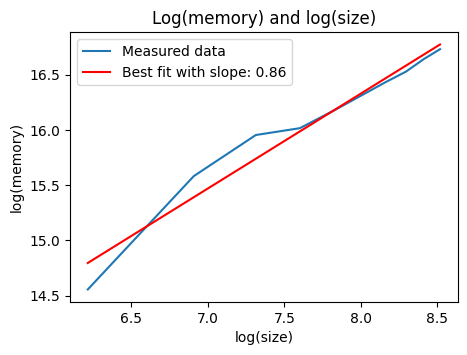

In [32]:
tam.log_plot('mat_mult_np', 'memory')

Again, the log plot above demonstrates the increased memory efficiency of the <code>mat_mult_np()</code> method. The slope of the best fit line is below one, which highlights a relationship that is  more efficient than a linear one, evidencing the benefit of using optimised methods to improve the scalability of code and resource management. 

### Inefficient Integer Sort

The <code>sort_ints()</code> method uses an inefficient sorting algorithm commonly known as Selection Sort. Full details can be found in the docstring for this method.

In [33]:
sort_ints = tam.investigate(tam.sort_ints, 'sort_ints', step_size=400, submission=True)
print(sort_ints)

   Size  Time (s)  Memory (bytes)
0   400  0.082925           40960
1   800  0.200214           40960
2  1200  0.451068           40960
3  1600  0.997305           40960
4  2000  1.469594           40960
5  2400  3.735391           40960
6  2800  4.827899           57344
7  3200  6.239969           57344
8  3600  8.044682           57344
9  4000  9.797529           77824


These results give data for input sizes ranging from 400 to 4000. They show that as size increases, the time taken to sort an unordered list grows. This appears to grow at a rate faster than a linear increase, and is likely to follow a quadratic relationship. This is because for each element in the list, the algorithm compares it to all the other remaining items. For a list of size $n$, the first item is compared to $n-1$ items, the second item to $n-2$, and so on, until the last item which doesn't need any comparisons. For the larger list sizes (greater than 2000), the time taken grows more significantly, hence also demonstrating that this sorting algorithm performs poorly on large input sizes. This can be highlighted on a line chart, where the time taken is plotted against a scaled quadratic polynomial. Memory measurements will be discussed in more detail below.

Number of values used to calculate scaling factor: 9
The scaling factor used is: 1.0556724316805122
Time residuals: [-0.00153613 -0.01956485 -0.04396104 -0.05820852 -0.10000361  0.02125848
  0.002767   -0.00310788  0.01109295  0.        ]


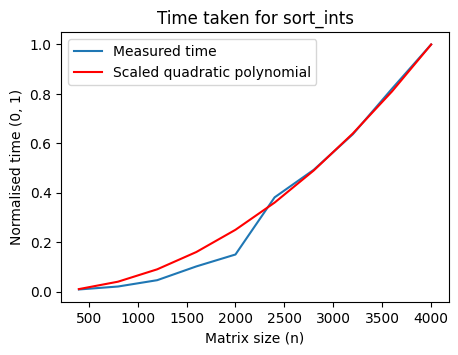

In [34]:
tam.plots('sort_ints', 'time', 'quadratic')

The above results demonstrate that the measured time results are closely aligned with the theoretical quadratic relationship, with the slight deviations more noticeable for smaller matrix sizes. The residuals are all small and close to zero, indicating a good fit between the scaled quadratic polynomial and the measured time data. Similar to the investigations into <code>mat_mult()</code> and <code>mat_mult_np()</code>, taking logs can expose the relationship further.

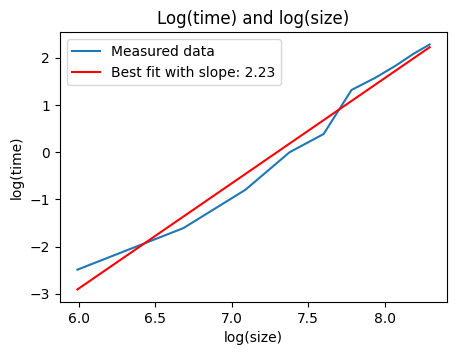

In [35]:
tam.log_plot('sort_ints', 'time')

The log plot above has a best fit slope of $2.2$. As this is greater than the expected slope of 2, this suggests that the growth in sorting time is slightly greater than the theoretical quadratic relationship. While the algorithms behaviour is aligned with quadratic results, the measured data may have deviated slightly due to practical limitations in recording results.

The memory used by <code>sort_ints()</code> does not follow a linear, quadratic, or cubic relationship. Instead, memory usage follows a more constant pattern, with jumps at particular input sizes. This is highlighted in the bar chart below. 

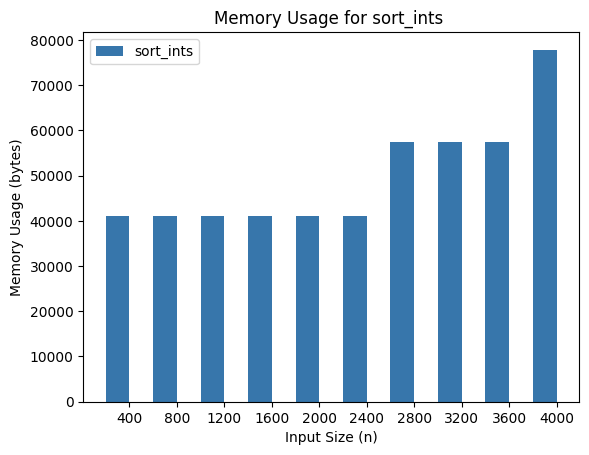

In [36]:
tam.plot_memory_bar('sort_ints')

For sizes 400 to 2400, the same memory allocation is used across the varying array sizes. This suggests that memory is allocated in fixed blocks rather than dynamically scaled based on input array size. However, memory usage increases significantly at sizes 2,800 and 4,000, jumping up to 57,344 bytes and 77,824 bytes respectively. This suggests that additional blocks of memory are allocated when the input array reaches certain sizes.
This memory allocation approach may be efficient for small arrays but may lead to large memory usage as array sizes grow. In particular, without knowing the threshold for increased memory allocation, this method may be using memory in an inefficient way, limiting the scalability of this approach. Further research into the limits for memory allocation could inform discussion about how efficient this method is in practice.

### Finding Substrings

This section of the assignment will compare two methods, <code>substring_inv()</code> and <code>python_find_inv()</code>. Both methods search for a substring within a main string. To make comparisons consistent between the two methods, they both utilise a similar approach to setting up a string and substring. Both methods use the helper methods <code>random_str()</code> which takes one argument, <code>length</code>, and generates a random string of a specified length. This helper method is used to generate a main string, and substring to be searched for, where the substring is 10% of the length of the main string. To allow comparisons, these two methods are investigated over the same input array sizes, and hardcoded results from running the <code>investigate()</code> method in a clean environment are used, as specified by the <code>submission</code> parameter, which is set to True. 

In [37]:
substring_inv = tam.investigate(tam.substring_inv, 'substring_inv', step_size=1000, submission=True)
print(substring_inv)

    Size  Time (s)  Memory (bytes)
0   1000  0.001513          163840
1   2000  0.002078          299008
2   3000  0.003120          413696
3   4000  0.004072          528384
4   5000  0.005971          638976
5   6000  0.007802          733184
6   7000  0.008427          901120
7   8000  0.009420          995328
8   9000  0.010666         1175552
9  10000  0.011602         1269760


Number of values used to calculate scaling factor: 9
The scaling factor used is: 0.9797598463259908
Time residuals: [ 0.03040855 -0.02089295 -0.03108085 -0.04902603  0.01465265  0.07247026
  0.02634029  0.01192898  0.01932425  0.        ]


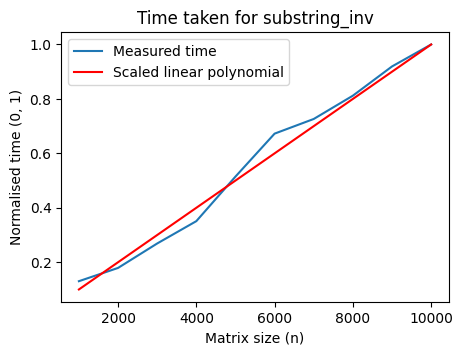

In [38]:
tam.plots('substring_inv', 'time', 'linear')

These results suggest that the time taken for the loop-based substring search method, <code>substring_inv()</code>, increases approximately linearly with the size of the main string. This is evident by the near straight line of the results, and the close fit of the graph to a scaled linear polynomial. Further, the residuals are centred around zero and show no obvious bias, indicating a good fit of the modelled straight line. 

While the algorithm is expected to have a time complexity of $O(n * m)$, where n is the length of the main string and m is the length of the substring, the measured data shows a closer fit to $O(n)$. This suggests that the substring length, set to 10% of the main string length, has a limited impact on the overall time complexity, making the trend effectively linear.

This linearity highlights the efficiency of the current implementation, where substring size is a small fraction of the main string size. If the size of the substring were to significantly change, the time complexity may change also. Potentially becoming closer to $O(n * m)$ as the substring length $(m)$ becomes more comparable to the size of the main string $(n)$.

Further analysis could explore how performance changes when the substring-to-main-string ratio varies. This is not included within this assignment as sufficient insight is already provided through this use-case. Instead the time complexity will be compared with a method that makes use of Python's <code>find()</code> method.

In [39]:
python_find_inv = tam.investigate(tam.python_find_inv, 'python_find_inv', step_size=1000, submission=True)
print(python_find_inv)

    Size  Time (s)  Memory (bytes)
0   1000  0.002591          163840
1   2000  0.002223          307200
2   3000  0.004204          425984
3   4000  0.006453          532480
4   5000  0.004950          679936
5   6000  0.005067          798720
6   7000  0.009603          888832
7   8000  0.009444          999424
8   9000  0.007722         1142784
9  10000  0.008916         1282048


The time results for a substring search using Python's <code>find()</code> method appear quicker than the results using the <code>substring_inv()</code> method. They also have drops in time taken at certain array sizes. Plotting the results against a scaled linear polynomial, helps highlight what is happening. 

Number of values used to calculate scaling factor: 9
The scaling factor used is: 0.950956857752629
Time residuals: [ 0.16981152  0.03149016  0.13777986  0.27197751  0.01546392 -0.07235239
  0.3         0.18344267 -0.09587629 -0.07154014]


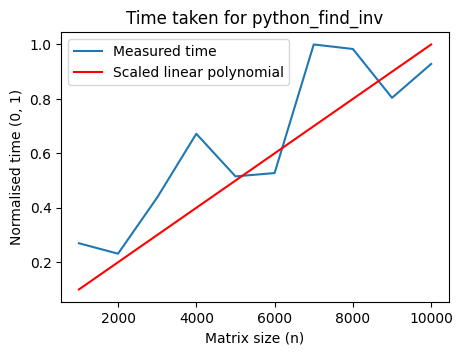

In [40]:
tam.plots('python_find_inv', 'time', 'linear')

The time taken by Python's <code>find()</code> method generally increases as the size of the main string grows. However, the trend is not as smooth as in the <code>substring_inv()</code> method. The time taken to perform the <code>find()</code> method increases roughly linearly, but drops down at sizes n = 2000, n = 5000, n = 9000. This suggests there may be some optimisations within the method that improve its performance across different string sizes. This method is more efficient than the <code>substring_inv()</code> method. 
Plotting the residuals against one another highlights these affects. The residuals deviate from the zero reference line to a far superior extent in the Python <code>find()</code> method. In particular, the residuals are generally much larger and more positive, which suggests the linear model is consistently underestimating the amount of time taken. 

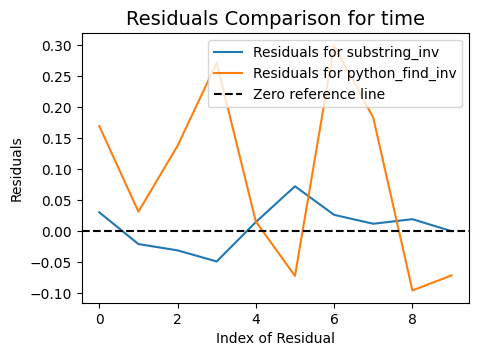

In [41]:
tam.plot_residuals('time', methods=['substring_inv', 'python_find_inv'])

The <code>substring_inv()</code> method shows a steady increase in memory usage as the input size grows. It starts with a memory allocation of 163,840 bytes for size 1,000 and progressively increases to 1,269,760 bytes for size 10,000. This memory growth is roughly linear, with some small fluctuations. For instance, the memory increases by 135,168 bytes between size 1,000 and Size 2,000, but by 114,688 bytes between Size 2,000 and Size 3,000. This can be highlighted by plotting the results against a scaled linear polynomial. Overall, this method uses memory proportionally to input array size.

Number of values used to calculate scaling factor: 9
The scaling factor used is: 0.9731497780721122
Memory residuals: [ 0.02903226  0.03548387  0.02580645  0.01612903  0.00322581 -0.02258065
  0.00967742 -0.01612903  0.02580645  0.        ]


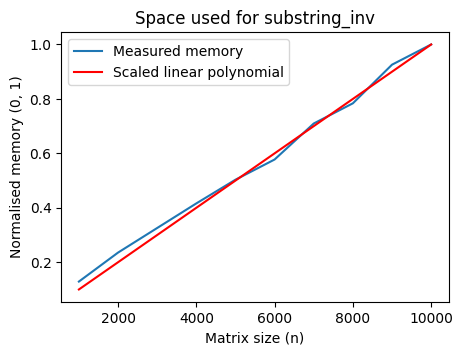

In [42]:
tam.plots('substring_inv', 'memory', 'linear')

The residuals from the plot above are consistently close to zero, and show no obvious bias to being all positive or negative -reinforcing that the relationship between array size and memory usage is close to linear. 

The <code>python_find_inv()</code> method also shows a linear growth pattern in memory usage, beginning at 163,840 bytes for size 1,000 and reaching 1,282,048 bytes for size 10,000. Similarly to the <code>substring_inv()</code> method, the <code>python_find_inv()</code> method shows fluctuations between the different input sizes, deviating from a smooth linear growth marginally. This can be evidenced by plotting a similar line chart.

Number of values used to calculate scaling factor: 9
The scaling factor used is: 0.9737429502443765
Memory residuals: [ 0.02779553  0.03961661  0.03226837  0.01533546  0.03035144  0.02300319
 -0.00670927 -0.02044728 -0.0086262   0.        ]


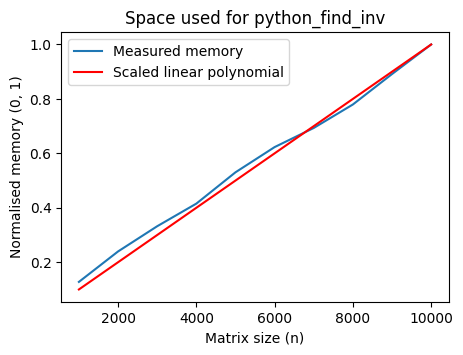

In [43]:
tam.plots('python_find_inv', 'memory', 'linear')

Plotting the two memory results together on a bar chart highlights the similar trends in both methods. Differences between the two methods are small for most of the tested input sizes. The data suggests that the <code>python_find_inv()</code> method may use slightly more memory for equivalent input sizes, but the differences are small. Further investigations could explore how this theory holds with much larger input sizes, and if the size of the substring being searched for was to deviate away from the current 10%. 

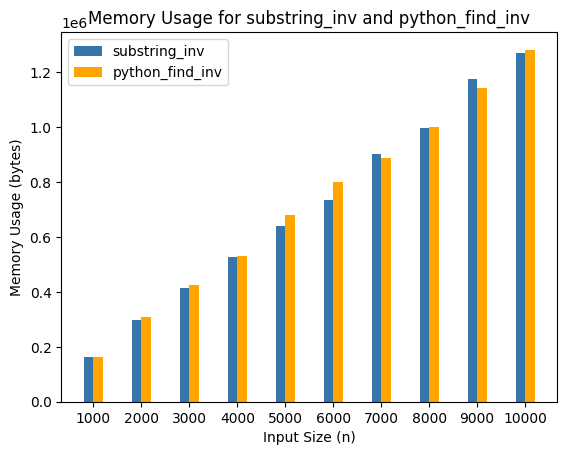

In [44]:
tam.plot_memory_bar('substring_inv', 'python_find_inv')

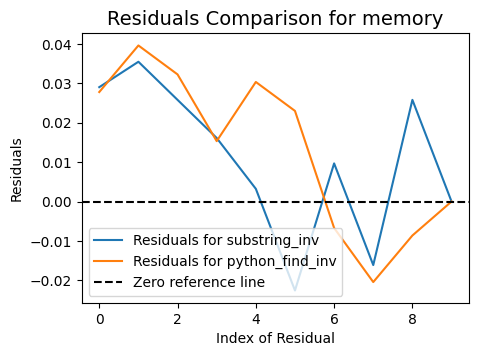

In [45]:
tam.plot_residuals('memory', methods=['substring_inv', 'python_find_inv'])

The memory residuals for the two methods highlight small differences in stability and variability in memory usage. <code>python_find_inv()</code> demostrates relatively consistent residuals, where positive deviations dominate early measurements, and small negative values appear later. This indicates stable memory performance, with minor changes from the theoretical trend. <code>substring_inv()</code> shows greater variability, alternating between positive and negative resiudals from the fifth measurement. This shows that memory usage strays away from the expected theoretical trend in a more random pattern. These differences suggest changes in algorithm efficiency and demonstrate that Python's <code>find()</code> method is more consistent in performance. Overall though, both methods demonstrate only minor fluctuations from the expected trend. 

#### Stage 2: Conclusion

This stage has highlighted the complexity of different algorithms, in relation to time and memory used. Plots have been used to demonstrate relationships between input size (either of a string, list, or matrix) and both time and memory used. Normalised plots, log-plots, and residual plots form the bulk of this discussion. The analysis has confirmed some expected trends, such as time complexity for a loop based matrix multiplication approach and linear behaviour for substring search. However, the most meaningful insight has been to uncover the improved performance of methods some in built methods. For instance NumPy's <code>dot()</code> method for matrix multiplication. These methods use in-built memory and time optimisations that can make algorithms more scalable and robust. 

#### Appendix. 

**Git log:**

In [46]:
!git log

commit 18485a3590ddff8181dc14488cd88fcb2a58d6be
Author: Hudson Farley-Moore <hjjfm1@st-andrews.ac.uk>
Date:   Mon Apr 28 15:26:35 2025 +0100

    Adding git log.

commit 1694ec547ff7aecb23fa581e5b48e719899625f9
Author: Hudson Farley-Moore <hjjfm1@st-andrews.ac.uk>
Date:   Mon Apr 28 15:21:17 2025 +0100

    final changes.

commit cd3c204fd3ad90ef00c2867afe37cca645f8df5f
Author: Hudson Farley-Moore <hjjfm1@st-andrews.ac.uk>
Date:   Mon Apr 28 15:20:47 2025 +0100

    updating python file name.

commit 62571703bde708b4daf68057497a82eb0a8e7728
Author: Hudson Farley-Moore <hjjfm1@st-andrews.ac.uk>
Date:   Thu Mar 27 19:22:06 2025 +0000

    Updating file after accidentally restoring an older version.

commit 7e9587f44a265fa2870d54fb109805a247aae74c
Author: Hudson Farley-Moore <hjjfm1@st-andrews.ac.uk>
Date:   Sun Mar 23 20:17:20 2025 +0000

    Developments in write up.

commit 919c9bf9d5cf5e450df0f29172c2a7e557c9d245
Author: Hudson Farley-Moore <hjjfm1@st-andrews.ac.uk>
Date:   Sat Mar 22